<a href="https://colab.research.google.com/github/XiaoQianBB/machine-learning-and-routing/blob/master/mult_agent_DDQN_For_routing_%E6%94%B9%E5%8A%A8%E6%88%90%E5%8A%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#搭建两个神经网络，一个用来拟合Q_table---会一直更新,一个会被冻结，大概每500步后，才会和第一个神经网络保持一致
from collections import deque
import random
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers, optimizers

In [17]:
class DQN(object):
    def __init__(self):
        self.step = 0
        self.update_freq = 20  # 模型更新频率
        self.replay_size = 100 # 记忆库大小
        self.replay_queue = deque(maxlen=self.replay_size)
        self.model = self.create_model()           #Q估计
        self.target_model = self.create_model()   #Q现实          
                       
    def create_model(self):
        #"""创建一个隐藏层为100的神经网络"""
        model = models.Sequential([
            layers.Dense(128,input_dim=STATE_DIM, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(128,activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(ACTION_DIM, activation="linear")
        ])
        model.compile(loss='mean_squared_error',
                      optimizer=optimizers.Adagrad())
        return model
    
    
    #选择一个与本路由器s直连的路由器作为action
    def act(self, gan, epsilon=0.1):
        #ep = epsilon - self.step * 0.0002
        #print('epsilon 等于 %s'%(ep))
        if np.random.uniform() < epsilon:
            choice = np.random.choice(nbr)                         #1-6（有效的）路由器的标识中随机选
            print('此次选择是任意选择的 rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr')
            #while choice in path:
              #  choice = np.random.choice(nbr) 
            return choice
        else:
            action_result = self.model.predict(np.array([vctor]))[0]        #假设s为：（action,dest_ip）这两者都是一个1-6的数字用来标识相应的路由器
            ind = np.argmax(action_result)    #将神经网络中的输出中最大的索引与邻居路由器映射起来     
            print('此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn')
            print('且此次神经网络的输入为：%s' % (vctor))
            return gan[ind]
    
    
    #这个函数在测试时使用,将act换为action
    def action(self, gan, epsilon=0.9):
        action_result = self.model.predict(np.array([vctor]))[0]        #假设s为：（action,dest_ip）这两者都是一个1-6的数字用来标识相应的路由器
        ind = np.argmax(action_result)    #将神经网络中的输出中最大的索引与邻居路由器映射起来     
        return gan[ind]
                      
    def save_model(self, file_path='C:\\Users\\钱孝宇的DELL\\Desktop\\python机器学习编程\\RL'):
        print('model saved')
        self.model.save(file_path)
      
    #对于环境进行一次交互的结果进行保存
    def remember(self, s, a, next_s, reward, eff_nbor):
        self.replay_queue.append((s, a, next_s, reward, eff_nbor))
    
    def train(self, batch_size= 64, lr=0.01, factor=1):
        if len(self.replay_queue) < self.replay_size:
            print('本次只将信息保存至记忆库中，未真正训练神经网络')
            return
        self.step += 1      #记录对模型进行训练的总次数
        print('%s路由器的step是%s' %(self,self.step))
        # 每 update_freq 步，将 model 的权重赋值给 target_model
        if self.step % self.update_freq == 0:
            self.target_model.set_weights(self.model.get_weights())
            print('！！！！！！！！！！正在训练Q现实神经网络！！！！！！！！')
        replay_batch = random.sample(self.replay_queue, batch_size)    #从记忆队列中随机选取batch_size组数据
        s_batch = np.array([replay[0] for replay in replay_batch])    #s_batch为选取的记录数据中的所有s，size:64*1
        next_s_batch = np.array([replay[2] for replay in replay_batch]) #next_s_batch为选取的记录数据中的所有next_s

        Q = self.model.predict(s_batch)   #Q为向实时更新的model输入所得结果的集合
        Q_next = self.target_model.predict(next_s_batch)    #64*6
    
        # 使用公式更新训练集中的Q值
        for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
            _, a, _, reward, bor = replay   #a是一个路由器标签
            #print('a = %s' % (a))
            #print('bor:%s' % (bor))
            ac = bor.index(a)           #从路由器标签映射成神经网络输出结果的索引
            Q[i][ac] = (1 - lr) * Q[i][ac] + lr * (reward + factor * np.amax(Q_next[i]))
 
        # 传入网络进行训练
        self.model.fit(s_batch, Q, verbose=0)
        print('@@@@@@@@正在训练Q估计神经网络@@@@@@@@')

In [18]:
STATE_DIM, ACTION_DIM = 18, 2
r1 = DQN()
STATE_DIM, ACTION_DIM = 18, 3
r2 = DQN()
STATE_DIM, ACTION_DIM = 18, 2
r3 = DQN()
STATE_DIM, ACTION_DIM = 18, 3
r4 = DQN()
STATE_DIM, ACTION_DIM = 18, 4
r5 = DQN()
STATE_DIM, ACTION_DIM = 18, 3
r6 = DQN()
STATE_DIM, ACTION_DIM = 18, 2
r7 = DQN()
STATE_DIM, ACTION_DIM = 18, 3
r8 = DQN()
STATE_DIM, ACTION_DIM = 18, 2
r9 = DQN()

def get_nbor(name):
    global nbr
    if name == 'r1':
        nbr = [2,4]
    elif name == 'r2':
        nbr = [1,3,5]
    elif name == 'r3':
        nbr = [2,6]
    elif name == 'r4':
        nbr = [1,5,7]
    elif name == 'r5':
        nbr = [2,4,6,8]
    elif name == 'r6':
        nbr = [3,5,9]   
    elif name == 'r7':
        nbr = [4,8]            
    elif name == 'r8':
        nbr = [5,7,9]            
    elif name == 'r9':
        nbr = [6,8]  
    return nbr

def get_act(rt):
    if rt == 'r1':
        gan = get_nbor(r1)
        action = r1.act(gan)
    if rt == 'r2':
        gan = get_nbor(r2)
        action = r2.act(gan)
    if rt == 'r3':
        gan = get_nbor(r3)
        action = r3.act(gan)
    if rt == 'r4':
        gan = get_nbor(r4)
        action = r4.act(gan)
    if rt == 'r5':
        gan = get_nbor(r5)        
        action = r5.act(gan)
    if rt == 'r6':
        gan = get_nbor(r6)
        action = r6.act(gan)
    if rt == 'r7':
        gan = get_nbor(r7)
        action = r7.act(gan)
    if rt == 'r8':
        gan = get_nbor(r8)
        action = r8.act(gan)
    if rt == 'r9':
        gan = get_nbor(r9)
        action = r9.act(gan)
    return action


def trainOneNode(rt):
    global bor
    if rt == 'r1':
        eff_nbor = get_nbor(rt)
        r1.remember(s, path[index+1], s, each, eff_nbor)
        r1.train()
    if rt == 'r2':
        eff_nbor = get_nbor(rt)
        r2.remember(s, path[index+1], s, each, eff_nbor)
        r2.train()
    if rt == 'r3':
        eff_nbor = get_nbor(rt)
        r3.remember(s, path[index+1], s, each, eff_nbor)
        r3.train()
    if rt == 'r4':
        eff_nbor = get_nbor(rt)
        r4.remember(s, path[index+1], s, each, eff_nbor)
        r4.train()
    if rt == 'r5':
        eff_nbor = get_nbor(rt)
        r5.remember(s, path[index+1], s, each, eff_nbor)
        r5.train()
    if rt == 'r6':
        eff_nbor = get_nbor(rt)
        r6.remember(s, path[index+1], s, each, eff_nbor)
        r6.train()
    if rt == 'r7':
        eff_nbor = get_nbor(rt)
        r7.remember(s, path[index+1], s, each, eff_nbor)
        r7.train()
    if rt == 'r8':
        eff_nbor = get_nbor(rt)
        r8.remember(s, path[index+1], s, each, eff_nbor)
        r8.train()
    if rt == 'r9':
        eff_nbor = get_nbor(rt)
        r9.remember(s, path[index+1], s, each, eff_nbor)
        r9.train()

In [19]:
#创建链路间时延的矩阵（是一个对角矩阵）
def create_delay_table():
    routers = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
    l1 = [0, 1.2, 0, 1, 0 ,0 ,0 ,0 ,0]
    l2 = [1.2, 0, 1.3, 0, 2, 0, 0, 0, 0]
    l3 = [0, 1.3, 0, 0, 0, 1.6, 0, 0 ,0]
    l4 = [1, 0, 0, 0, 3, 0, 1.5, 0, 0]
    l5 = [0, 2, 0, 3, 0, 2.5, 0, 1.3, 0]
    l6 = [0 , 0, 1.6, 0 ,2.5, 0, 0, 0, 1.4]
    l7 = [0, 0, 0, 1.5, 0, 0, 0, 2.2, 0]
    l8 = [0, 0, 0, 0, 1.3, 0, 2.2, 0, 1.7]
    l9 = [0, 0, 0, 0, 0, 1.4, 0, 1.7, 0]
    data = np.array([l1,l2,l3,l4,l5,l6,l7,l8,l9])
    delay = pd.DataFrame(
        data,
        index = routers,
        columns = routers,)  
    return delay

#随机化初始一个数据包和其源目地址
def create_packet():
    src = np.random.choice(range(1,10))
    dst = np.random.choice(range(1,10))
    while src == dst:
        dst = np.random.choice(range(1,10))
    vctor[src-1] = 1
    vctor[dst-1] = 3
    path.append(src)
    return src, dst

#根据传入的数字，运行对应的路由器节点，输出转发节点标识（数字）
def run_router(router_num):
    rt = 'r' + str(router_num)
    print('now packet is on router: %s' % (rt))
    nbr = get_nbor(rt)
    print('nbrs are : %s' % (nbr))
    action = get_act(rt)         #为get_action函数时，即为在测试，为get_act函数时为在训练
    return action

#将每个节点之后的累计时延加和并构造成一个列表返回
def count_reward():
    rd = []
    re = 0
    i = len(path)-1
    while i > 0:
        j = i-1
        col = path[i]
        row = path[j]
        re = re + (-1) *(delay.iat[row-1, col-1])
        rd.append(re)
        i = j
    return rd

In [ ]:
episodes = 1000
for i in range(1,episodes+1):
    print('#############################这是第%s轮发包#########################################' % (i))
    delay = create_delay_table()
    vctor = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    path = []

    src, dst = create_packet()      #初始化包的源目地址，并将原地址加入路径列表
    print('src is : %s, and dst is %s ' % (src, dst))
    path_len = 0

    while len(path) > path_len:     #转发数据包直到到达目的地
        path_len = len(path)
        #print('path[path_len-1] is %s' % (path[path_len-1]))
        if len(path) == 1:
            action = run_router(path[path_len-1])
        else:
            vctor[9+path[len(path)-2]-1] = 2         #先将上一跳路由器标识出
            action = run_router(path[path_len-1])
            vctor[9+path[len(path)-2]-1] = 0         #将上一跳路由器的标识还原
        print('the packet will go to router %s' % (action))
        print('本路由器上的工作已完成，即将进入下一个路由器：r%s' %(action))
        print('')
        if action == dst:
            path.append(action)
            break
        else:
            path.append(action)
    print('the packet aleard arrive destination ,the total path is %s' % (path))

    rd = count_reward()    #计算各节点的时延（倒叙）
    print('本次转发数据包，经过的各路由器节点上的累计reward(时延):%s' % (rd))

    
    print('此次转发数据包时，经过的各个路由器的训练开始……………………………………')
    #训练相应的路由器节点中的神经网络
    index = len(path)-2    #取出要train的第一个路由器的标识数字
    for each in rd:
        vct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        name = 'r' + str(path[index])
        print('正在尝试训练路由器%s' % (name))
        s = vct
        
        #是否回传检测
        if index >= 1:
            next_router = path[index+1]        #本路由器上产生的动作
            last_router = path[index-1]        #此数据包的来源路由器
            if next_router == last_router:
                each+=-10                      #当本路由器产生回传动作时，给一个大大的惩罚
            s[9+last_router-1] = 2               #2代表此数据包是由哪个路由器转发过来的
        
        s[src-1] = 1                       #1代表数据包的源地址（当源地址与前一跳地址相同时，只有源地址）
        s[dst-1] = 3                       #3代表数据包的目的地址
        
        trainOneNode(name)          #一次训练一个相应的节点
        index = index - 1

流式输出内容被截断，只能显示最后 5000 行内容。
此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
且此次神经网络的输入为：[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
the packet will go to router 8
本路由器上的工作已完成，即将进入下一个路由器：r8

now packet is on router: r8
nbrs are : [5, 7, 9]
此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
且此次神经网络的输入为：[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
the packet will go to router 5
本路由器上的工作已完成，即将进入下一个路由器：r5

now packet is on router: r5
nbrs are : [2, 4, 6, 8]
此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
且此次神经网络的输入为：[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
the packet will go to router 8
本路由器上的工作已完成，即将进入下一个路由器：r8

now packet is on router: r8
nbrs are : [5, 7, 9]
此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
且此次神经网络的输入为：[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
the packet will go to router 5
本路由器上的工作已完成，即将进入下一个路由器：r5

now packet is on router: r5
nbrs are : [2, 4, 6, 8]
此次选择是由神经网络产生的 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
且此次神经网络的输入为：[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
r5.replay_queue

deque([([0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        4,
        [0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        -21.9,
        [2, 4, 6, 8]),
       ([0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        8,
        [0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        -38.699999999999996,
        [2, 4, 6, 8]),
       ([0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        6,
        [0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        -56.49999999999999,
        [2, 4, 6, 8]),
       ([0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        6,
        [0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        -61.49999999999999,
        [2, 4, 6, 8]),
       ([0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        6,
        [0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        -56.49999999999999,
        [2, 4, 6, 8]),
       ([0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]

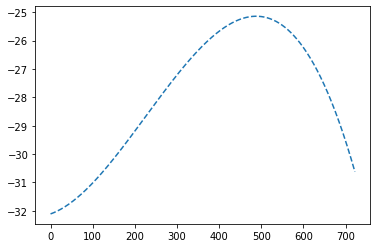

In [6]:
replay_batch = r1.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

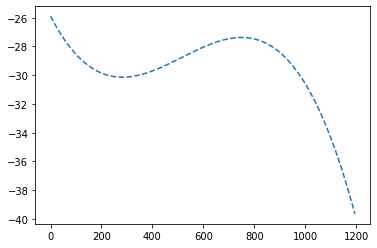

In [7]:
replay_batch = r2.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

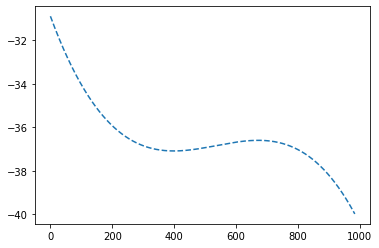

In [8]:
replay_batch = r3.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

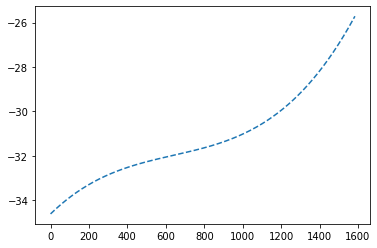

In [9]:
replay_batch = r4.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

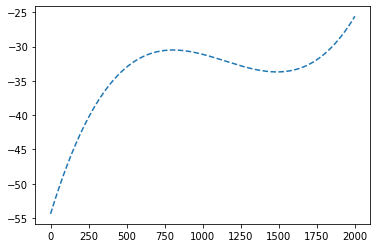

In [10]:
replay_batch = r5.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

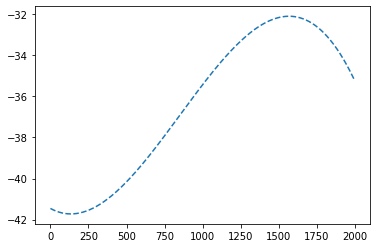

In [11]:
replay_batch = r6.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

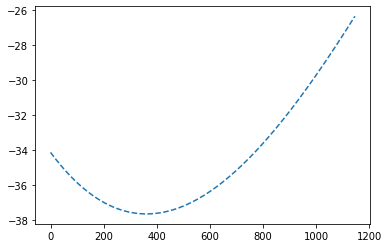

In [12]:
replay_batch = r7.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

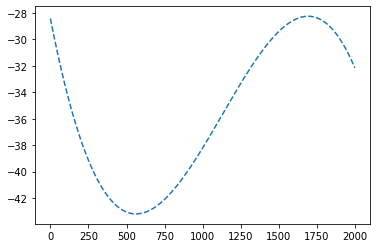

In [13]:
replay_batch = r8.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

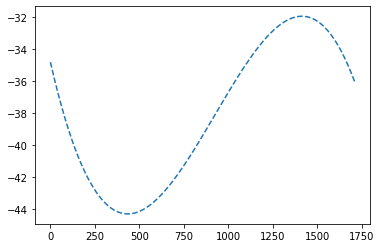

In [14]:
replay_batch = r9.replay_queue
score_list = []
for i, replay in enumerate(replay_batch):    #replay:(s, a, next_s, reward)的元组
        _, _, _, reward, _ = replay   #a是一个路由器标签
        score_list.append(reward)
import matplotlib.pyplot as plt
#plt.plot(score_list)
x = np.array(range(len(score_list)))
smooth_func = np.poly1d(np.polyfit(x, score_list, 3))
plt.plot(x, smooth_func(x), label='Mean', linestyle='--')
plt.show()

In [15]:
episodes = 1000
for i in range(1000,episodes+1):
    print('#############################这是第%s轮发包#########################################' % (i))
    delay = create_delay_table()
    vctor = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    path = []

    src, dst = create_packet()      #初始化包的源目地址，并将原地址加入路径列表
    print('src is : %s, and dst is %s ' % (src, dst))
    path_len = 0

    while len(path) > path_len:     #转发数据包直到到达目的地
        path_len = len(path)
        #print('path[path_len-1] is %s' % (path[path_len-1]))
        if len(path) == 1:
            action = run_router(path[path_len-1])
        else:
            vctor[9+path[len(path)-2]-1] = 2         #先将上一跳路由器标识出
            action = run_router(path[path_len-1])
            vctor[9+path[len(path)-2]-1] = 0         #将上一跳路由器的标识还原
        print('the packet will go to router %s' % (action))
        print('本路由器上的工作已完成，即将进入下一个路由器：r%s' %(action))
        print('')
        if action == dst:
            path.append(action)
            break
        else:
            path.append(action)
    print('the packet aleard arrive destination ,the total path is %s' % (path))

    rd = count_reward()    #计算各节点的时延（倒叙）
    print('本次转发数据包，经过的各路由器节点上的累计reward(时延):%s' % (rd))

    
    print('此次转发数据包时，经过的各个路由器的训练开始……………………………………')
    #训练相应的路由器节点中的神经网络
    index = len(path)-2    #取出要train的第一个路由器的标识数字
    for each in rd:
        vct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        name = 'r' + str(path[index])
        print('正在尝试训练路由器%s' % (name))
        s = vct
        
        #是否回传检测
        if index >= 1:
            next_router = path[index+1]        #本路由器上产生的动作
            last_router = path[index-1]        #此数据包的来源路由器
            if next_router == last_router:
                each+=-10                      #当本路由器产生回传动作时，给一个大大的惩罚
            s[9+last_router-1] = 2               #2代表此数据包是由哪个路由器转发过来的
        
        s[src-1] = 1                       #1代表数据包的源地址（当源地址与前一跳地址相同时，只有源地址）
        s[dst-1] = 3                       #3代表数据包的目的地址
        
        trainOneNode(name)          #一次训练一个相应的节点
        index = index - 1

#############################这是第1000轮发包#########################################
src is : 6, and dst is 3 
now packet is on router: r6
nbrs are : [3, 5, 9]
epsilon 等于 0.6718
此次选择是任意选择的 rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr
the packet will go to router 3
本路由器上的工作已完成，即将进入下一个路由器：r3

the packet aleard arrive destination ,the total path is [6, 3]
本次转发数据包，经过的各路由器节点上的累计reward(时延):[-1.6]
此次转发数据包时，经过的各个路由器的训练开始……………………………………
正在尝试训练路由器r6
<__main__.DQN object at 0x7fb0d179ee10>路由器的step是142
@@@@@@@@正在训练Q估计神经网络@@@@@@@@
